### Шваб Кирилл, J42112  
# <center>Лабораторная работа №1</center>
 <center>Вариант 16</center>

Реализуйте собственный генератор случайной выборки с функцией распределения $F(x)$:

$$p(x):=\frac{\chi_{[7,9]}(x)\cdot(x-7)(x+1)}{20}$$


### 1. Проверьте выполнение условия нормировки. Нормируйте соответствующим образом, если условие нарушается.

 Функция распределения случайной величины имеет следующий вид:
$$F(x)=\begin{cases} 0 \quad\text{, если } x<7\\
\frac{(x-7)(x+1)}{20} \quad\text{, если } x \in [7,9]\\
1 \quad\text{, если } x>9\\
\end{cases}$$

Функция плотности распределения случайной величины имеет следующий вид:
 
$$ p(x)=\begin{cases} 0 \quad\text{, если } x<7\\
\frac{x-3}{10} \quad\text{, если } x \in [7,9]\\
0 \quad\text{, если } x>9\\
\end{cases}$$

Геометрический смысл условия нормировки — площадь под кривой плотности распределения равна единице. То есть интеграл от функции должен быть равен единице.
$$\int_{7}^{9}\frac{x-3}{10} dx+\int_{-∞}^{7}0dx+\int_{9}^{+∞}0dx=(\frac{27}{20}-\frac{7}{20})+0+0=1$$

Таким образом, площадь под нашей функцией плотности равна единице и условие нормировки сохраняется.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from numpy.random import uniform

Создадим функции распределения и плотности распределения случайных величин

In [2]:
%%time
# Начало и конец отрезка функции плотности распределения
A, B = 7, 9

def pdf_function(x):
    """Фукнция плотности распределения случайной величины"""
    global A,B
    if x >= A and x <= B:
        return (x-3.0)/10.0
    else:
        return 0

def cdf_function(x):
    """"Функция распределения случайной величины"""
    global A,B
    if x<A:
        return 0
    elif x >= A and x <= B:
        return (x-7)*(x+1)/20 
    else:
        return 1

# что мы здесь делаем
pdf = np.vectorize(pdf_function,otypes=[float])  
cdf = np.vectorize(cdf_function,otypes=[float])  

interval = np.linspace(A - 0.5,B + 0.5 , num=10**3) # наш интервал значений
pdf_x = pdf(interval) # значения плотности распределения
cdf_x = cdf(interval) # значения функции распределения

Wall time: 3 ms


Проверим геометрическое условие нормировки численно

In [3]:
# расчитаем интеграл для фукнции плотности
# берем промежуток (7,9), так как на интервале с бесконечностями мы пропускаем значения локального минимума
integrate.quad(pdf_function, A, B) # нужно почитать почему мы использем именно такие значения

(1.0, 1.1102230246251565e-14)

## 2. Постройте график фукнции распределения

 Функция распределения случайной величины имеет следующий вид:
$$F(x)=\begin{cases} 0 \quad\text{, если } x<7\\
\frac{(x-7)(x+1)}{20} \quad\text{, если } x \in [7,9]\\
1 \quad\text{, если } x>9\\
\end{cases}$$

Изобразим функцию плотности распределения и функцию распределения

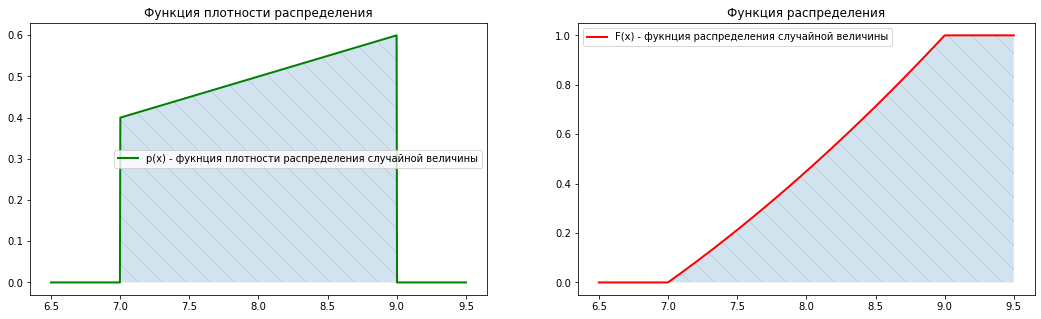

In [4]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title('Функция плотности распределения')
plt.plot(interval, pdf_x, linewidth=2, color='green',
         label='p(x) - фукнция плотности распределения случайной величины')
plt.fill_between(interval, pdf_x, hatch='\\', edgecolor ='gray', linewidth=0.0,alpha=0.2)
plt.legend(loc = 'best')


plt.subplot(1, 2, 2)
plt.title('Функция распределения')
plt.plot(interval, cdf_x, color='red', linewidth=2,
         label='F(x) - фукнция распределения случайной величины')
plt.legend(loc = 'best')
plt.fill_between(interval, cdf_x, hatch='\\', edgecolor ='gray', linewidth=0.0,alpha =0.2)
plt.show()

## 3. Сгенерируйте выборку из 
- 10 элементов
- 100 элементов
- 1000 элементов

 Для того, чтобы сгенерировать выборку по заданному закону распределения необходимо получить обратную функцию от текущей функции распределения случайной величины:
$$y=F^{-1}(x)=\begin{cases} 0 \quad\text{, если } x<0\\
{3+2\sqrt{5x+4}} \quad\text{, если } x \in[0; 1]\\
1 \quad\text{, если } x>1
\end{cases}$$

In [5]:
# Границы отрезка для обратной функции
A_INV = 0
B_INV = 1

def idf_function(x):
    """обратная функция распределения"""
    global A_INV, B_INV
    if x >= A_INV and x <=B_INV:
        return 3+2*np.sqrt(5*x+4)
    elif x < A_INV:
        return A
    elif x > B_INV:
        return B

In [6]:
idf = np.vectorize(idf_function,otypes=[float]) 
# интервал прорисовки обратной функции
inverse_interval = np.linspace(A_INV - 0.1,B_INV + 0.1 , num=10**3)
idf_x = idf(inverse_interval)

Изобразим обратную функцию распределения

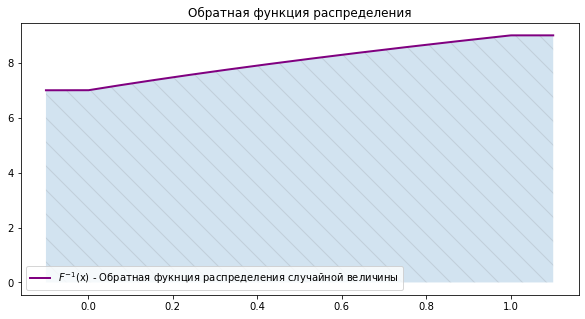

In [13]:
plt.figure(figsize=(10, 5))
plt.title('Обратная функция распределения')
plt.plot(inverse_interval, idf_x, linewidth=2, color='purple',
         label='$F^{-1}$(x) - Обратная фукнция распределения случайной величины')
plt.fill_between(inverse_interval, idf_x, hatch='\\', edgecolor ='gray', linewidth=0.0,alpha =0.2)

plt.legend(loc='best')
plt.show()


In [14]:
# Генерация выборки размера number
def create_sample(number):
    arr = [idf_function(x) for x in uniform(A_INV, B_INV, number)]
    print(f'Создан набор из {number} элементов')
    return arr

samples = [create_sample(i) for i in [10, 100, 1000, 10**6]]  # список выборок

Создан набор из 10 элементов
Создан набор из 100 элементов
Создан набор из 1000 элементов
Создан набор из 1000000 элементов


## 4. Постройте гистограмму частот для выборки из предыдущего пункта и сравните ее с плотностью распределения

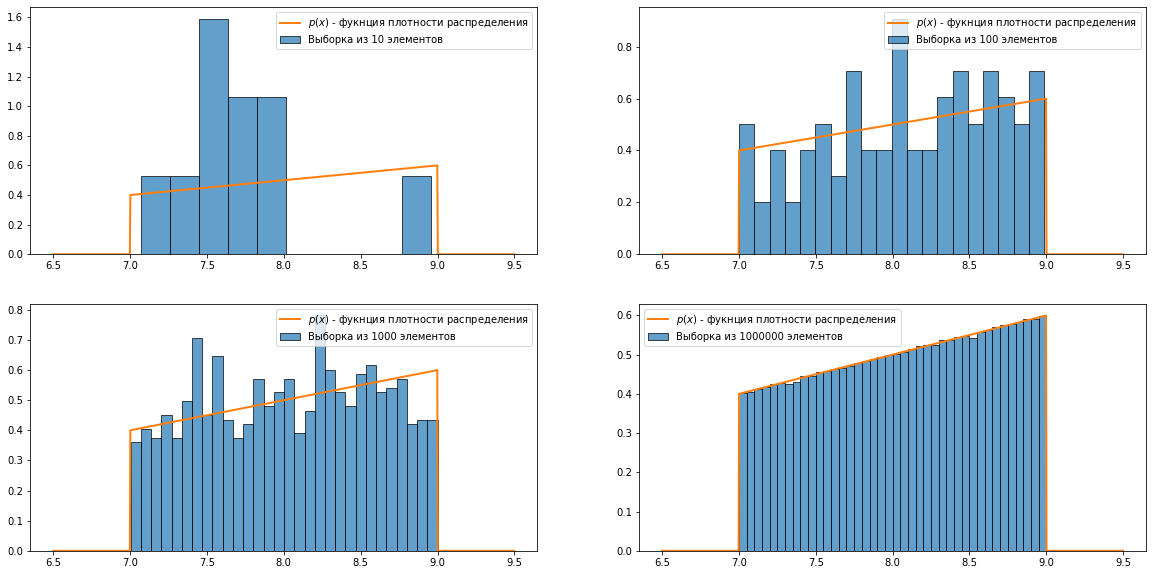

In [17]:
plt.figure(figsize=(20, 10))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.hist(samples[i-1], 10+(i-1)*10, density=True, alpha=0.7, ec='black',
             label=f'Выборка из {len(samples[i-1])} элементов')
    plt.plot(interval, pdf_x, linewidth=2,
             label='$p(x)$ - фукнция плотности распределения')
    plt.legend(loc='best')


## 5. Напишите функцию, которая будет выводить следующую статистику по выборке: 
- минимальное/ максимальное значение; 
- размах; 
- среднее; 
- выборочную дисперсию (с поправкой и без); 
- среднеквадратическое отклонение; 
- медиану; 
- 25%-ную и 75%-ную квантили; 
- коэффициент вариации; 
- коэффициент асимметрии; 
- коэффициент эксцесса

In [10]:
from scipy.stats import variation, kurtosis, skew


def statistic_info(arr: np.array):
    book = dict()
    book['Минимальное значение'] = arr.min()
    book['Максимальное значение'] = arr.max()
    book['Размах'] = arr.max() - arr.min()
    book['Мат. ожидание'] = arr.mean()
    book['Дисперсия'] = arr.var()
    book['Среднеквадратичное отклонение'] = arr.std()
    book['Медиана'] = np.median(arr) # увы arr.median() не работает, а как хотелось бы...
    book['25% квантиль'] = np.quantile(arr, 0.25)
    book['75% квантиль'] = np.quantile(arr, 0.75)
    book['Коэффициент вариации'] = variation(arr)
    book['Коэффициент асимметрии'] = skew(arr)
    book['Коэффициент эксцесса'] = kurtosis(arr)

    return book


In [11]:
for i in range(len(samples)):
    print('='*35)
    print(f'ВЫБОРКА ИЗ {len(samples[i])} ЭЛЕМЕНТОВ')
    print('='*35)
    print(*[f'{k} : {v}' for k,
            v in statistic_info(np.array(samples[i])).items()], sep='\n')


ВЫБОРКА ИЗ 10 ЭЛЕМЕНТОВ
Минимальное значение : 7.382099629723665
Максимальное значение : 8.936919042987185
Размах : 1.5548194132635196
Мат. ожидание : 8.121234646667565
Дисперсия : 0.3137332991857683
Среднеквадратичное отклонение : 0.560119004485447
Медиана : 8.21599376350996
25% квантиль : 7.543343369525413
75% квантиль : 8.523221007315364
Коэффициент вариации : 0.06896968611974338
Коэффициент асимметрии : 0.04452515549027133
Коэффициент эксцесса : -1.520432608833689
ВЫБОРКА ИЗ 100 ЭЛЕМЕНТОВ
Минимальное значение : 7.018600472023527
Максимальное значение : 8.971009191169736
Размах : 1.9524087191462094
Мат. ожидание : 8.164275688550063
Дисперсия : 0.3822519736097971
Среднеквадратичное отклонение : 0.6182652938745609
Медиана : 8.226357158070767
25% квантиль : 7.606528879479009
75% квантиль : 8.743597594846374
Коэффициент вариации : 0.07572812548964303
Коэффициент асимметрии : -0.39339866038275106
Коэффициент эксцесса : -1.1887460643807648
ВЫБОРКА ИЗ 1000 ЭЛЕМЕНТОВ
Минимальное значение : 